In [1]:
import os
import xarray as xr

import numpy as np
import geopandas as gpd

import matplotlib.path as mplPath
import matplotlib.cm as cm

from netCDF4 import Dataset
import dateutil.parser
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt

In [2]:
# salish sea atlantis box shapefile.
shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
data_df = gpd.read_file(shapefile_name)

In [3]:
boxes = data_df['BOTZ']
land_boxes = boxes==0
land_boxes = data_df.index[land_boxes]
print(boxes)
print(land_boxes)

0        0
1        0
2        0
3        0
4      100
      ... 
125    250
126    250
127      0
128      0
129    250
Name: BOTZ, Length: 130, dtype: int64
Int64Index([  0,   1,   2,   3,   6,   7,  10,  11,  12,  14,  16,  17,  24,
             26,  28,  29,  31,  32,  37,  38,  39,  40,  41,  42,  43,  44,
             49,  51,  52,  57,  60,  85, 108, 109, 110, 111, 112, 113, 114,
            115, 117, 124, 127, 128],
           dtype='int64')


In [4]:
parcelsFileName = './results/Oil_disperse5b_Turn_Point_Diluted_bitumen-02.nc'

In [5]:
pfile = xr.open_dataset(str(parcelsFileName), decode_cf=True)

In [6]:
lon = np.ma.filled(pfile.variables['lon'], np.nan)
lat = np.ma.filled(pfile.variables['lat'], np.nan)
time = np.ma.filled(pfile.variables['time'], np.nan)
z = np.ma.filled(pfile.variables['z'], np.nan)
probs = np.ma.filled(pfile.variables['decay_value'], np.nan)

In [7]:
print(lon.shape)
numParticles = lon.shape[0]

(100, 169)


In [8]:
trackDates = [];

for i in range(0,numParticles):
    print(time[i][0])
    #trackDates.append( dateutil.parser.parse(time[i][0]))
    trackDates.append(time[i][0])

RDiff = (max(trackDates) - min(trackDates))
print(RDiff)

2018-01-01T18:00:00.000000000
2018-01-01T07:00:00.000000000
2018-01-01T22:00:00.000000000
2018-01-01T23:00:00.000000000
2018-01-01T16:00:00.000000000
2018-01-01T11:00:00.000000000
2018-01-01T11:00:00.000000000
2018-01-01T19:00:00.000000000
2018-01-01T15:00:00.000000000
2018-01-01T22:00:00.000000000
2018-01-01T07:00:00.000000000
2018-01-01T07:00:00.000000000
2018-01-01T01:00:00.000000000
2018-01-01T13:00:00.000000000
2018-01-01T13:00:00.000000000
2018-01-01T10:00:00.000000000
2018-01-01T23:00:00.000000000
2018-01-01T04:00:00.000000000
2018-01-01T02:00:00.000000000
2018-01-01T03:00:00.000000000
2018-01-01T18:00:00.000000000
2018-01-01T02:00:00.000000000
2018-01-01T12:00:00.000000000
2018-01-01T12:00:00.000000000
2018-01-01T21:00:00.000000000
2018-01-01T02:00:00.000000000
2018-01-01T06:00:00.000000000
2018-01-01T01:00:00.000000000
2018-01-01T01:00:00.000000000
2018-01-01T05:00:00.000000000
2018-01-01T23:00:00.000000000
2018-01-01T07:00:00.000000000
2018-01-01T10:00:00.000000000
2018-01-01

In [9]:
minDate = np.datetime64("2018-01-01T00:00:00");
outputDT = 60*60

stepsPerDay = int(86400.0/ outputDT);

numStepsPerDT = int(outputDT/3600.0)

trackLength = len(lon[0]);

numReleaseDays = RDiff
print('numReleaseDays = ' + str(numReleaseDays))

numReleaseDays = 82800000000000 nanoseconds


In [10]:
numReleaseDTS = int(abs(numReleaseDays/np.timedelta64(1, 'h')));
totalNumOfTS = int(numReleaseDTS + trackLength);
print('totalNumOfTS = ' + str(totalNumOfTS))
print('trackLength = ' + str(trackLength))

totalNumOfTS = 192
trackLength = 169


In [11]:
#numParticles = 1
print(numParticles)

100


In [13]:
trackLonsPadded = np.zeros((int(numParticles), totalNumOfTS));
trackLatsPadded = np.zeros((int(numParticles), totalNumOfTS));
particlesAge = np.zeros((int(numParticles), totalNumOfTS));

for trackIndex in range(0,numParticles):

    print(trackDates[trackIndex])
    print(minDate)
    trackDateDiff = trackDates[trackIndex] - minDate

    print(trackDateDiff/np.timedelta64(1, 'h'))

    #trackNumsToPad = int(abs((trackDateDiff.seconds/stepSeconds))) + int(abs((trackDateDiff.days * stepDays)));
    trackNumsToPad = int(trackDateDiff/np.timedelta64(1, 'h'))
    print(trackNumsToPad)
    #trackNumsToPad = 0

    #print trackNumsToPad

    trackLonsPadded[trackIndex][0:trackNumsToPad] = 0;
    trackLatsPadded[trackIndex][0:trackNumsToPad] = 0;

    trackLonsPadded[trackIndex][trackNumsToPad:trackNumsToPad + trackLength] = lon[:][trackIndex];
    trackLatsPadded[trackIndex][trackNumsToPad:trackNumsToPad + trackLength] = lat[:][trackIndex];

#print(trackLonsPadded)
#print('trackLength = ' + str(trackLength))
#print('numStepsPerDT = ' + str(numStepsPerDT))
numSteps = int(trackLength / numStepsPerDT)

2018-01-01T18:00:00.000000000
2018-01-01T00:00:00
18.0
18
2018-01-01T07:00:00.000000000
2018-01-01T00:00:00
7.0
7
2018-01-01T22:00:00.000000000
2018-01-01T00:00:00
22.0
22
2018-01-01T23:00:00.000000000
2018-01-01T00:00:00
23.0
23
2018-01-01T16:00:00.000000000
2018-01-01T00:00:00
16.0
16
2018-01-01T11:00:00.000000000
2018-01-01T00:00:00
11.0
11
2018-01-01T11:00:00.000000000
2018-01-01T00:00:00
11.0
11
2018-01-01T19:00:00.000000000
2018-01-01T00:00:00
19.0
19
2018-01-01T15:00:00.000000000
2018-01-01T00:00:00
15.0
15
2018-01-01T22:00:00.000000000
2018-01-01T00:00:00
22.0
22
2018-01-01T07:00:00.000000000
2018-01-01T00:00:00
7.0
7
2018-01-01T07:00:00.000000000
2018-01-01T00:00:00
7.0
7
2018-01-01T01:00:00.000000000
2018-01-01T00:00:00
1.0
1
2018-01-01T13:00:00.000000000
2018-01-01T00:00:00
13.0
13
2018-01-01T13:00:00.000000000
2018-01-01T00:00:00
13.0
13
2018-01-01T10:00:00.000000000
2018-01-01T00:00:00
10.0
10
2018-01-01T23:00:00.000000000
2018-01-01T00:00:00
23.0
23
2018-01-01T04:00:00.00

In [14]:
Atlantis_FileName = 'Oil_Box_11_dt_3600.nc'
savefile_prefix = 'boxes'

#[numParticles, numTracks, trackLons, trackLats, trackProbs, trackLengths, dt, trackTimes] = readTracks(outFileName, 0, startCountDay);

pfile = xr.open_dataset(str(Atlantis_FileName), decode_cf=True)

print(pfile)

time = np.ma.filled(pfile.variables['time'], np.nan)
#print(time)
oil = np.ma.filled(pfile.variables['Oil'], np.nan)
num_steps = time.shape[0]
print(num_steps)

<xarray.Dataset>
Dimensions:  (t: 193, b: 130)
Dimensions without coordinates: t, b
Data variables:
    time     (t) datetime64[ns] ...
    Oil      (t, b) float32 ...
193


In [ ]:
v_max = 80
_cmap = cm.viridis
file_names = []
#num_steps = 2

land_df = data_df.loc[land_boxes]
#num_steps = 24
for time_index in range(0, num_steps):

    plon = trackLonsPadded[:, time_index]
    plat = trackLatsPadded[:, time_index]

    plon = plon[plon<0]
    plat = plat[plat>0]
    time_oil = oil[time_index]
    #print(time_oil)

    data_df['oil'] = time_oil
    data_df.loc[land_boxes, 'oil'] = 10000

    #print(data_df['oil'])
    ax = data_df.plot(figsize=(15, 15), column = 'oil', cmap = _cmap, vmin=0, vmax=v_max, legend=True)
    land_df.plot(ax=ax, color='gray')
    ax.scatter(plon, plat, s=10, color='red', zorder=20)

    ax.set_title(time[time_index])

    #plt.tight_layout()
    plot_name = savefile_prefix + '_time_' + str(time_index) + '.png'
    plt.savefig(plot_name)
    file_names.append(plot_name)
    #plt.close()

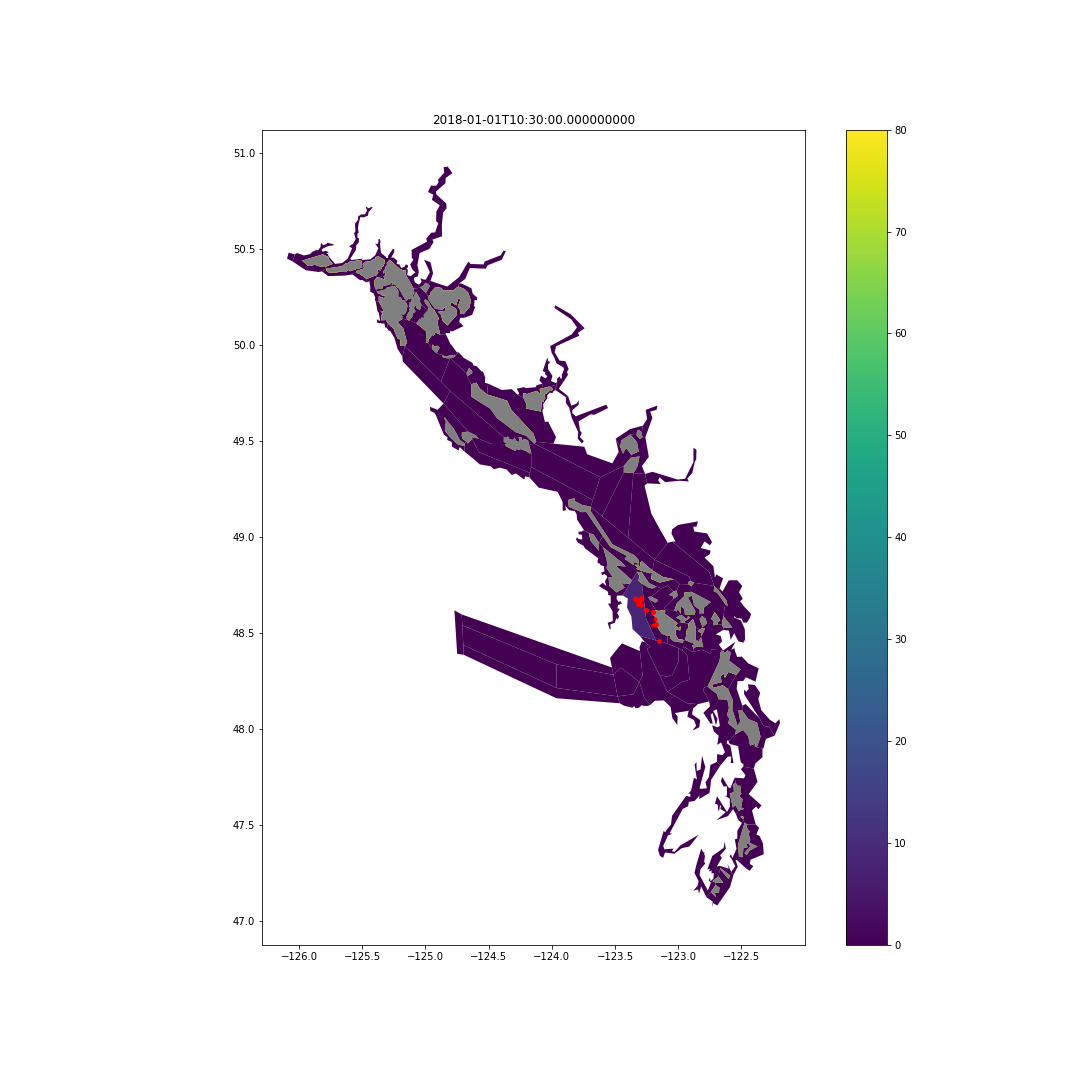

In [33]:
from IPython.display import Image
Image(filename='./results/Figs/boxes_time_10.png') 

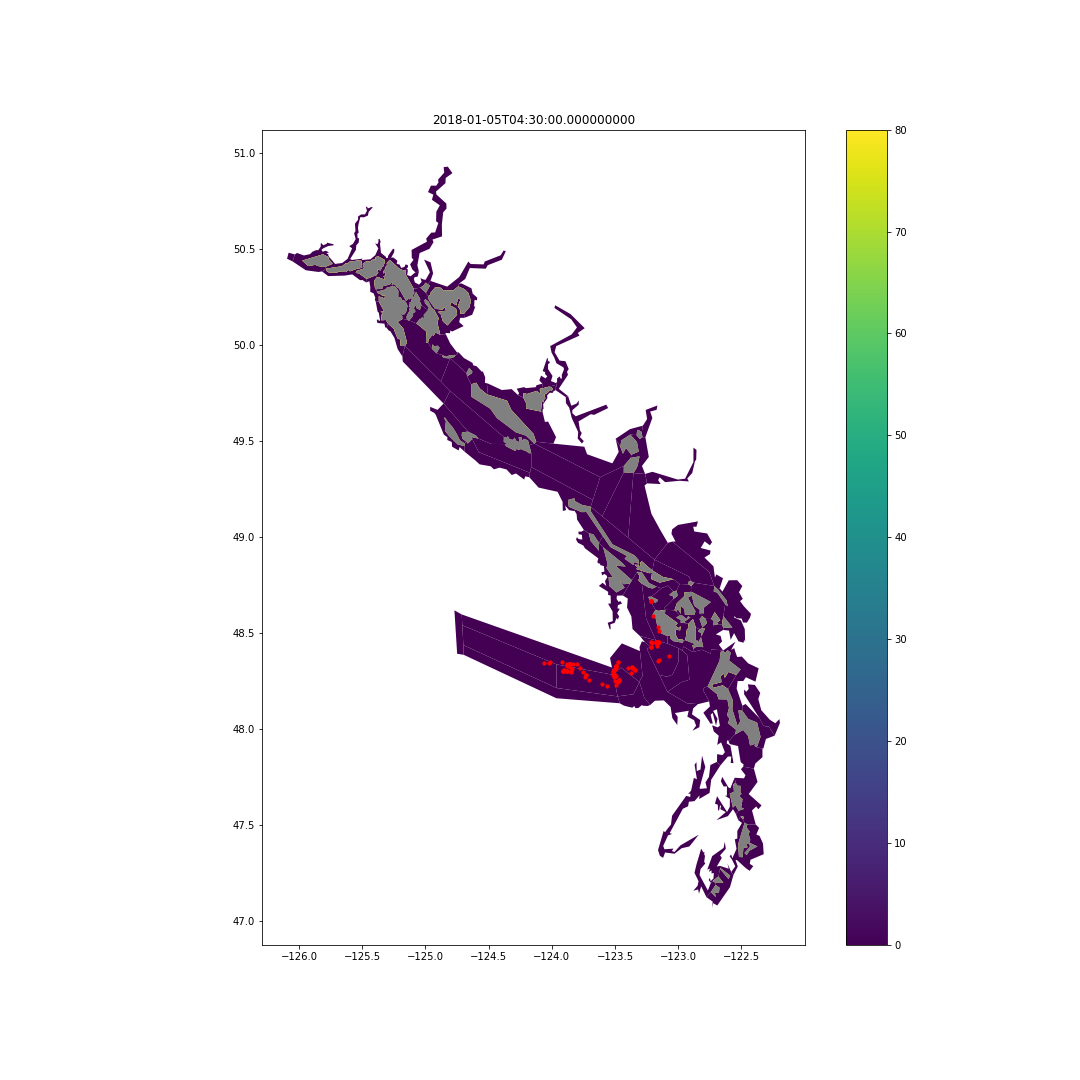

In [35]:
Image(filename='./results/Figs/boxes_time_100.png')  

In [35]:
file_name_str = ' '.join(file_names)
#print(file_name_str)
os.system('convert -delay 30 -loop 0 ' + file_name_str + ' ' + savefile_prefix + '.gif')
os.system('rm ' + file_name_str)

0